### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "int_xing_scan_end_of_levelling"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0568/config.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  num_particles_per_bunch crossing_angle                      
lhcb1 1.000000e+11            150.0               base_collider   
                              160.0               base_collider   
                              170.0               base_collider   
                              180.0               base_collider   
                              190.0               base_collider   
...                                                         ...   
      1.600000e+11            230.0               base_collider   
                              240.0               base_collider   
                              250.0               base_collider   
                              260.0               base_collider   
                              270.0               base_collider   

                                              normalized amplitude in xy-plane  \
beam  num_particles_per_bunch crossing_angle                                     
lhcb1 1.000000e+11            150.0                                      4.000   
                              160.0                                      4.000   
                              170.0                                      4.000   
                              180.0                                      4.188   
                              190.0                                      4.438   
...                                                                        ...   
      1.600000e+11            230.0                                      4.344   
                              240.0                                      4.500   
                              250.0                                      4.656   
                              260.0                                      4.375   
                              270.0                                      4.594   

                                                  qx     qy   dqx   dqy  \
beam  num_particles_per_bunch crossing_angle                              
lhcb1 1.000000e+11            150.0           62.315  60.32  15.0  15.0   
                              160.0           62.315  60.32  15.0  15.0   
                              170.0           62.315  60.32  15.0  15.0   
                              180.0           62.315  60.32  15.0  15.0   
                              190.0           62.315  60.32  15.0  15.0   
...                                              ...    ...   ...   ...   
      1.600000e+11            230.0           62.315  60.32  15.0  15.0   
                              240.0           62.315  60.32  15.0  15.0   
                              250.0           62.315  60.32  15.0  15.0   
                              260.0           62.315  60.32  15.0  15.0   
                              270.0           62.315  60.32  15.0  15.0   

                                              i_bunch_b1  i_bunch_b2  \
beam  num_particles_per_bunch crossing_angle                           
lhcb1 1.000000e+11            150.0                150.0       147.0   
                              160.0                150.0       147.0   
                              170.0                150.0       147.0   
                              180.0                150.0       147.0   
                              190.0                150.0       147.0   
...                                                  ...         ...   
      1.600000e+11            230.0                150.0       147.0   
                              240.0                150.0       147.0   
                              250.0                150.0       147.0   
                              260.0                150.0       147.0   
                              270.0                150.0       147.0   

                                              i_oct_b1  i_oct_b2  \
beam  num_particles_per_bunch crossing_angle                       
lhcb1 1.000000e+11            150.0             -300.0   

In [3]:
df['num_particles_per_bunch'] = df['num_particles_per_bunch']/1e11

In [4]:
# Reshape for plotting
df_to_plot = df.pivot(index="crossing_angle", columns="num_particles_per_bunch", values="normalized amplitude in xy-plane")
df_to_plot

num_particles_per_bunch,1.0,1.1,1.2,1.3,1.4,1.5,1.6
crossing_angle,,,,,,,
150.0,4.000,4.000,4.000,4.000,4.000,4.000,4.000
160.0,4.000,4.000,4.000,4.000,4.000,4.000,4.000
170.0,4.000,4.000,4.000,4.000,4.000,4.000,4.000
180.0,4.188,4.000,4.000,4.000,4.000,4.000,4.000
190.0,4.438,4.312,4.094,4.000,4.000,4.000,4.000
200.0,4.812,4.781,4.344,4.156,4.094,4.000,4.000
210.0,5.312,5.062,4.594,4.531,4.281,4.219,4.094
220.0,5.875,5.250,5.094,4.781,4.562,4.094,4.219
230.0,5.906,5.844,5.438,5.094,4.875,4.406,4.344


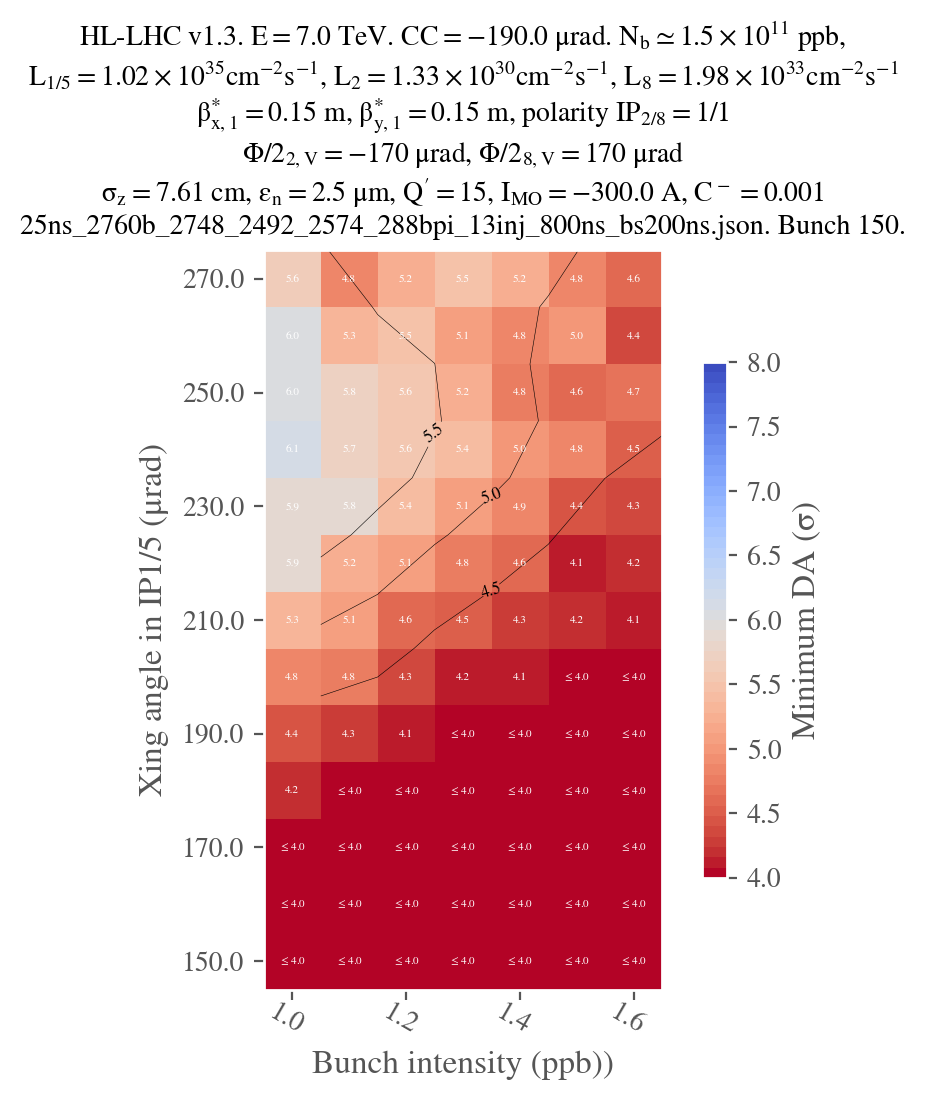

In [5]:
#l_oct = np.linspace(-300,300,25)
#df_to_plot.columns = [str(oct) for oct in l_oct]

# replace nan in df by 10
#df_to_plot = df_to_plot.fillna(10)


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

ylabel = r"Xing angle in IP1/5 ($\mu$rad)"
xlabel = r"Bunch intensity (ppb))" 
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.15,
    bety=0.15,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=True,
    green_contour=6.,
    CC = True,
    vmin=4.,
    vmax=8.0,
    extended_diagonal=False,
    Nb=True,
    display_xing = False,
    display_tune = False,
    PU = False,
    ignore_lumi_1_5 = False,
    #title="opt_collapse_1100_1500_oct_scan",
)
